# Техническое задание

Техническое задание полностью выполняется с помощью языка программирования
Python. В таблице Excel НЕЛЬЗЯ вносить какие-либо изменения вручную.
В файле «data.xlsx» представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.

Имеющиеся поля:

● client_id - ID клиента;

● sum – сумма денежных средств;

● status – статус оплаты;

● sale – менеджер, заключивший сделку;

● new/current – статус сделки;

● document – наличие оригинала подписанного договора с клиентом;

● receiving_date – дата получения оригинала договора.


Вопросы:
1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.
2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.
3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?
4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?
5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

import missingno

import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame(pd.read_excel('D:/DATA/datasets/test_sdelki/data.xlsx'))

In [4]:
data.to_csv ("D:/DATA/datasets/test_sdelki/datacsv.csv", 
                  index = None,
                  header=True)

In [5]:
df = pd.read_csv("D:/DATA/datasets/test_sdelki/datacsv.csv")

In [6]:
display(df.head(20))
display(df.tail(20))
display(df.info())
display(df.describe())

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.70,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.70,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.70,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00
7,21.0,3613.70,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00
8,23.0,8511.70,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00
9,24.0,16347.70,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00


,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
710,271.0,3671.70,ОПЛАЧЕНО,Петрова,текущая,NaN,НЕТ,NaN
711,273.0,10133.70,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-11-09 00:00:00
712,274.0,23477.10,В РАБОТЕ,Петрова,текущая,NaN,НЕТ,NaN
713,281.0,6243.70,ПРОСРОЧЕНО,Соколов,текущая,NaN,НЕТ,NaN
714,282.0,953.70,ПРОСРОЧЕНО,Соколов,текущая,NaN,НЕТ,NaN
715,302.0,9628.70,ПРОСРОЧЕНО,Петрова,новая,NaN,НЕТ,NaN
716,341.0,2073.70,ПРОСРОЧЕНО,Петрова,новая,NaN,НЕТ,NaN
717,303.0,22113.70,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-11-09 00:00:00
718,304.0,2803.70,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-11-09 00:00:00
719,398.0,453.70,ПРОСРОЧЕНО,Попов,новая,NaN,НЕТ,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


None

,client_id,sum,Unnamed: 5
count,724.000000,724.000000,0.0
mean,183.084254,7162.542030,NaN
std,106.590761,6308.571297,NaN
min,6.000000,23.700000,NaN
25%,86.000000,3114.732500,NaN
50%,194.000000,5207.990000,NaN
75%,273.000000,8934.950000,NaN
max,398.000000,39713.500000,NaN


# Предобработка данных

In [7]:
df.drop(columns=["Unnamed: 5"], inplace=True)

In [8]:
df['client_id'].fillna('00', inplace=True)

In [9]:
df['client_id'] = df['client_id'].astype(int)

In [10]:
df = df.loc[df['receiving_date'] != '-']
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format="%Y-%m-%d %H:%M:%S")

In [11]:
df = df.assign(month =  0)
for i in range(729):
    if i >= 0 and i <= 129:
        df.iloc[i, 7] = 5
    elif i >= 130 and i <= 257:
        df.iloc[i, 7] = 6
    elif i >= 259 and i <= 368:
        df.iloc[i, 7] = 7
    elif i >= 370 and i <= 483:
        df.iloc[i, 7] = 8
    elif i >= 485 and i <= 593:
        df.iloc[i, 7] = 9
    elif i >= 595 and i <= 729:
        df.iloc[i, 7] = 10

In [12]:
df.dropna(subset=['sum'], inplace=True)

<Axes: >

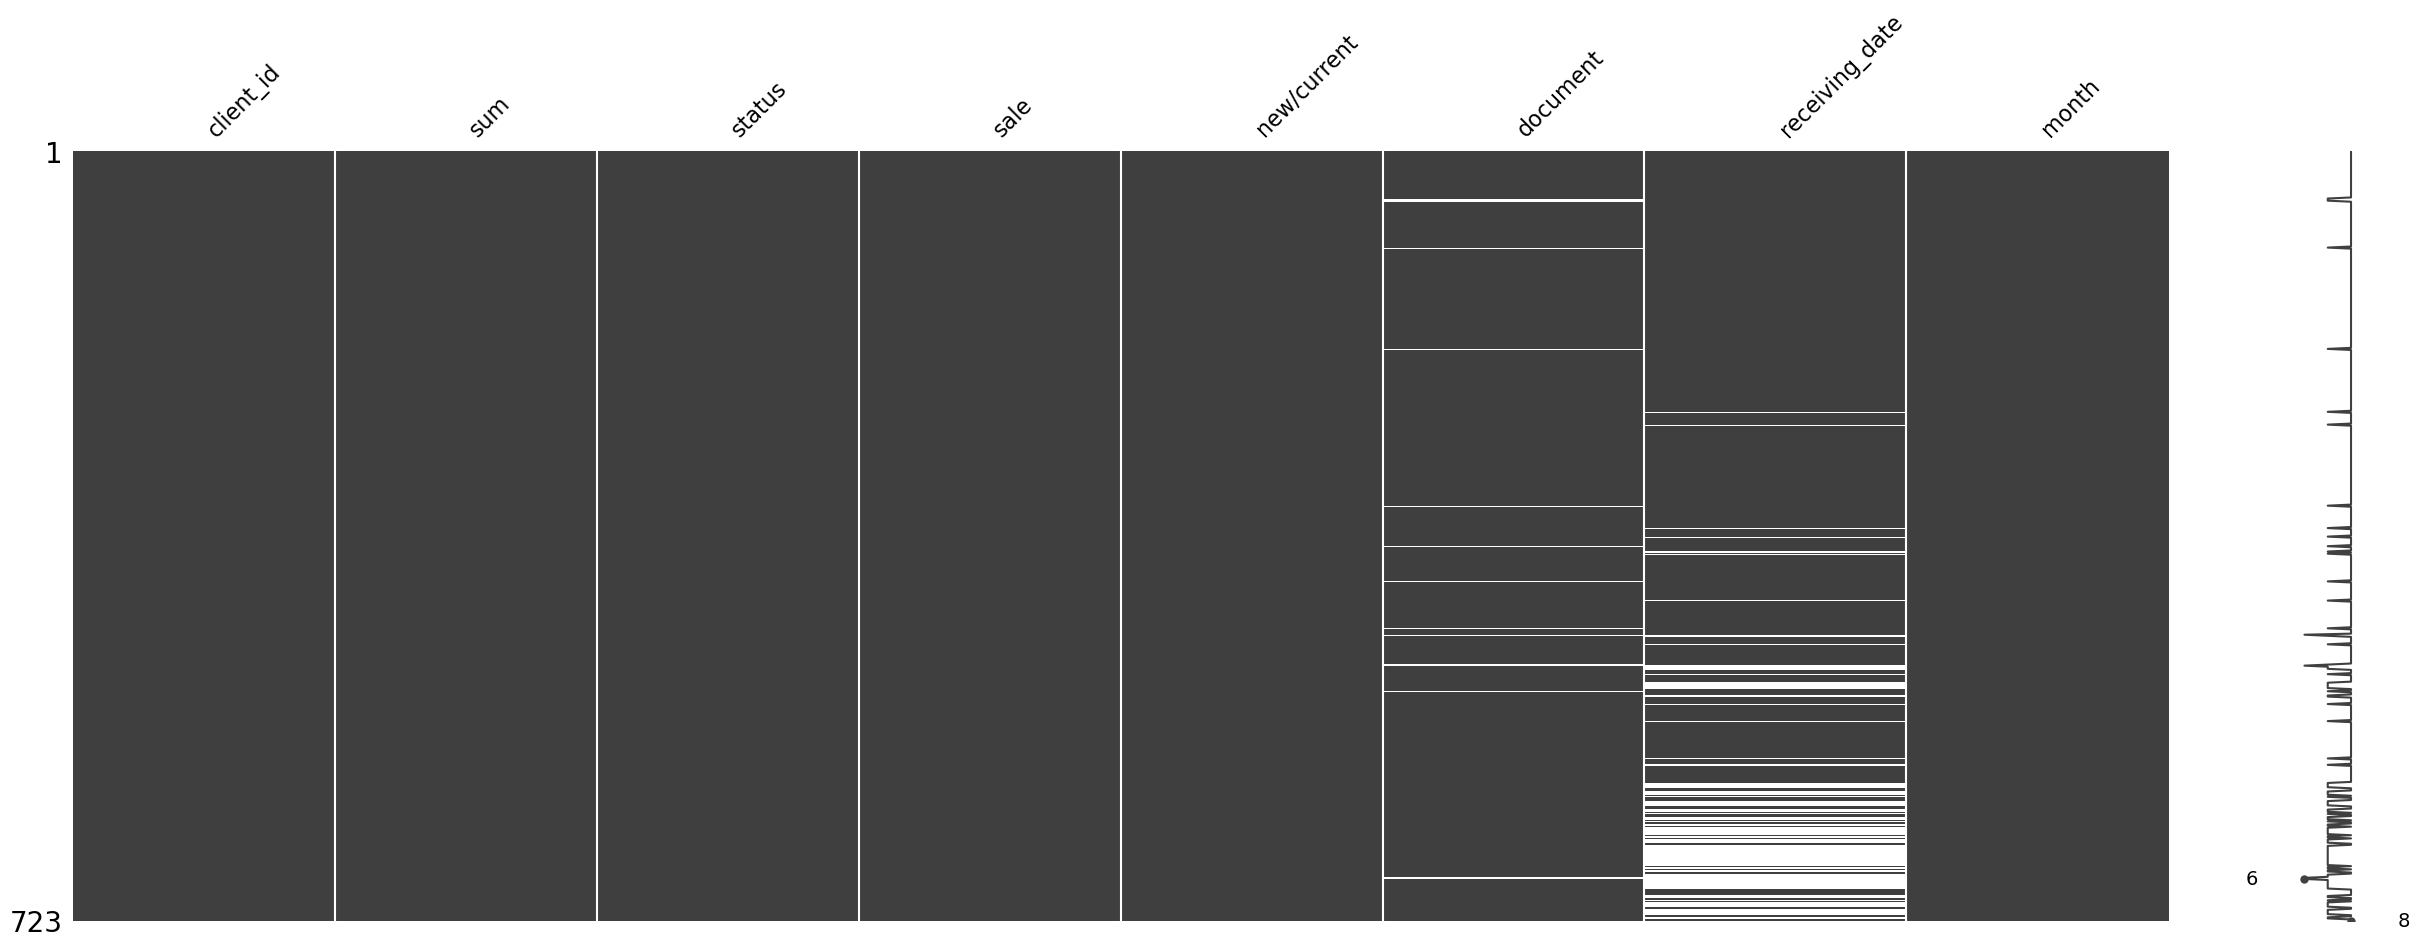

In [13]:
missingno.matrix(df, figsize = (30,10))

In [14]:
display(df.head(20))

,client_id,sum,status,sale,new/current,document,receiving_date,month
2,14,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5
3,15,13991.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
4,16,719.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
5,18,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5
6,20,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5
7,21,3613.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13,5
8,23,8511.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,5
9,24,16347.70,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,5
10,28,10537.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,5
11,30,3833.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-21,5


# Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [15]:
july_sales = df[(df['status'] == 'ОПЛАЧЕНО') & (df['month'] == 6)]

In [16]:
total_revenue_july = july_sales['sum'].sum()

In [17]:
print("Общая выручка за июль 2021 :", total_revenue_july)

Общая выручка за июль 2021 : 765788.7099999995


# Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [18]:
revenue_by_date = july_sales.groupby('receiving_date')['sum'].sum()

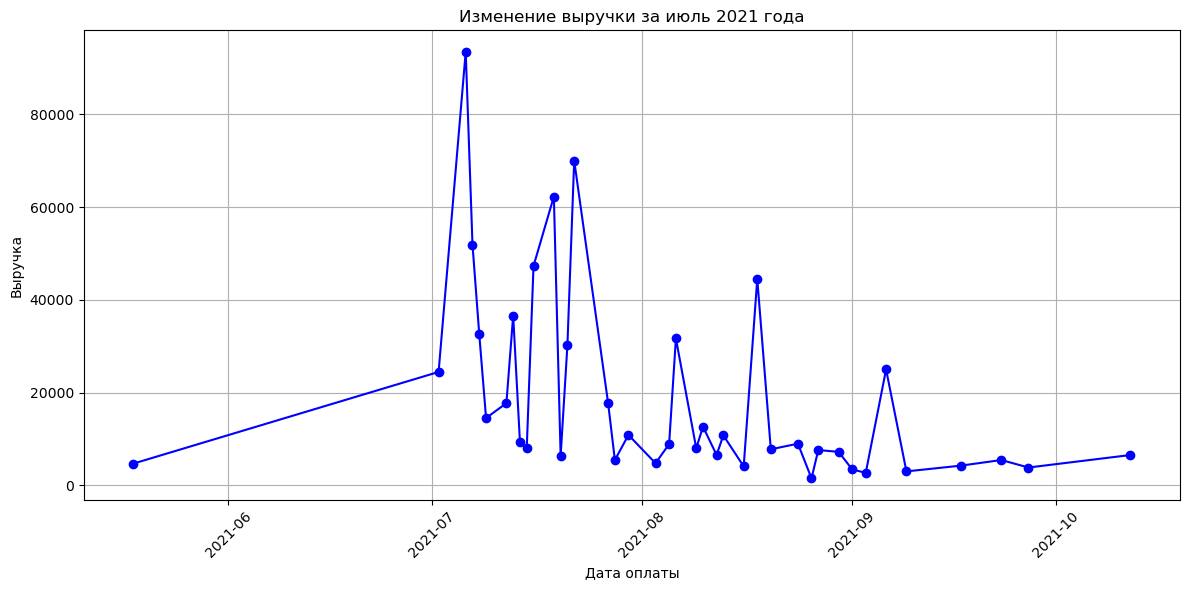

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_date.index, revenue_by_date.values, marker='o', linestyle='-', color='b')
plt.title('Изменение выручки за июль 2021 года')
plt.xlabel('Дата оплаты')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [20]:
september_sales = df[(df['status'] == 'ОПЛАЧЕНО') & (df['receiving_date'].dt.month == 9)]

In [21]:
manager_revenue = september_sales.groupby('sale')['sum'].sum()

In [22]:
top_manager = manager_revenue.idxmax()
top_manager_revenue = manager_revenue.max()

In [23]:
print("Менеджер, привлекший больше всего денежных средств в сентябре:", top_manager)
print("Сумма выручки, привлеченной этим менеджером:", top_manager_revenue)

Менеджер, привлекший больше всего денежных средств в сентябре: Петрова
Сумма выручки, привлеченной этим менеджером: 210386.42


# Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [24]:
october_sales = df[(df['status'] == 'ОПЛАЧЕНО') & (df['receiving_date'].dt.month == 10)]


In [25]:
deal_type_counts = october_sales['new/current'].value_counts()

In [26]:
predominant_deal_type = deal_type_counts.idxmax()
predominant_deal_type_count = deal_type_counts.max()

In [27]:
print("Преобладающий тип сделок в октябре:", predominant_deal_type)
print("Количество сделок этого типа:", predominant_deal_type_count)

Преобладающий тип сделок в октябре: текущая
Количество сделок этого типа: 97


# Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [28]:
may_sales = df[(df['status'] == 'ОПЛАЧЕНО') & (df['receiving_date'].dt.month == 5)]

In [29]:
may_original_count = may_sales[may_sales['document'] == 'оригинал'].shape[0]

In [30]:
june_sales = df[(df['receiving_date'].dt.month == 6)]

In [31]:
june_original_count = june_sales[june_sales['document'] == 'оригинал'].shape[0]

In [32]:
difference = june_original_count - may_original_count

In [33]:
print("Количество оригиналов договоров по майским сделкам, полученных в июне :", difference)

Количество оригиналов договоров по майским сделкам, полученных в июне : 72


# Задание: За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

In [34]:
target_month = 10  

target_month_sales = df[(df['status'] == 'ОПЛАЧЕНО') & (df['receiving_date'].dt.month == target_month)]

target_month_sales_with_original = target_month_sales[target_month_sales['document'] == 'оригинал']

manager_bonuses = target_month_sales_with_original.groupby('sale')['sum'].sum() * 0.07

print("Сумма бонусов для каждого менеджера за новые сделки в", target_month, "месяце:")
print(manager_bonuses)

Сумма бонусов для каждого менеджера за новые сделки в 10 месяце:
sale
Андреев       10735.7950
Васильев       1845.6725
Иванов         6550.5790
Кузнецова      6139.0280
Михайлов        298.8090
Петрова        6362.8642
Смирнов       13879.8100
Соколов        1676.9270
Филимонова     4076.7804
Name: sum, dtype: float64


За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце). Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [35]:
target_month = 7

original_documents = df[df['document'] == 'оригинал']

original_documents_before_target_month = original_documents[(original_documents['receiving_date'].dt.month <= target_month)]

def calculate_current_deal_bonus(sum):
    if sum > 10000:
        return 0.05 * sum  
    else:
        return 0.03 * sum  

original_documents_before_target_month['current_deal_bonus'] = original_documents_before_target_month['sum'].apply(calculate_current_deal_bonus)

manager_current_deal_bonuses = original_documents_before_target_month.groupby('sale')['current_deal_bonus'].sum()

manager_total_bonuses = original_documents.groupby('sale')['sum'].sum() * 0.07  

manager_remaining_bonuses = manager_total_bonuses - manager_current_deal_bonuses

print("Остаток бонусов для каждого менеджера на 01.07.2021:")
print(manager_remaining_bonuses)

Остаток бонусов для каждого менеджера на 01.07.2021:
sale
Андреев       39443.0166
Васильев      11832.2075
Иванов        34471.4250
Кузнецова     29038.0821
Михайлов             NaN
Петрова       54140.2294
Селиванов      6481.9050
Смирнов       44034.5520
Соколов              NaN
Филимонова    17405.9800
dtype: float64


C:\Users\mamay\AppData\Local\Temp\ipykernel_16868\2022895778.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_documents_before_target_month['current_deal_bonus'] = original_documents_before_target_month['sum'].apply(calculate_current_deal_bonus)
